# **PROJETO ANALISE DE INADIMPLENCIA**
---
## PASSOS

>- 1. Compreender problema/tarefa e definir problema/objetivo/como
>- 2. Coleta de dados
>- 3. Tratar Dados 
>- 4. Analise exploratória (Relações, Limites, Outliers, Tendências e padrões)
>- 5. Mineração de dados para Criar modelos (Algoritimos Machine e Deep Learning) – Aprendizado/Teste
>- 6. Disponibilização visual da informação
>- 7. Implantar

---
### 1.1 Resumo da conversa
>- WKT - empresa de emprestimo.
>- Inadimplencia alta
>- Teremos dados dos ultimos emprestimos
>- Analise dos dados
>- taxa de 35% de inadimple
>- É possivel baixar para pelo menos 25%?
>- Status na tabela credito é o objetivo

### 1.2 Definições

>### **Problema:** Indice de Inadimplência alta
>### **Objetivo:** Reduzir de 35% para 25% atraves de tecnicas de Machine Learning para auxilio na tomada de decisão dos novos emprestimos.
>### **Como:** Criar modelo de previsão mais eficiente com base nos dados da tabela de credito

---
---

## INFORMACOES E MATERIAL DE APOIO

>### **Banco de dados ( POSTGRESQL ):** Em anexo existe um arquivo chamado "backupcredito_postgresql.tar" e esta base deve ser restaurada no postgresql.
>### **PYTHON :** O codigo foi escrito em python e o codigo esta abaixo com todo o descritivo, bibliotecas utilizadas:
>* PANDAS
>* MATPLOTLIB
>* PSYCOPG2 
>* SKLEARN
>* SEABORN
>* MATH





## **IMPORTANDO BIBLIOTECAS**
---
### A biblioteca do skit learning será carregada posteriormente somente os metodos necessarios.

In [91]:
import pandas as pd
import numpy as np
import psycopg2
import seaborn as srn
import matplotlib.pyplot as plt
import math

## **2.1 Realizar a coleta dos dados**
---
### Neste caso, Apos previa analise das tabelas que nos foi informado no banco de dados, iremos realizar analise mais profundas dos dados pelo python.

In [11]:
conexao = psycopg2.connect(host="localhost",database="DB_HUGO", user="postgres", password="Hugo", port=5432)


In [12]:
cursor = conexao.cursor()
consulta_teste = "select * from credito"
cursor.execute(consulta_teste)

In [13]:
columns = [desc[0] for desc in cursor.description]

In [14]:
registros = cursor.fetchall()

In [15]:
df = pd.DataFrame(registros, columns=columns)

In [16]:
df

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3,2,1,3,2,22,3,1,1,4,1,0,0,0
1,3,12,1,2,2096,2,4,2,4,3,3,49,3,1,1,3,2,0,0,1
2,4,42,2,3,7882,2,4,2,4,4,4,45,3,2,1,4,2,0,0,1
3,5,24,3,4,4870,2,3,3,4,3,4,53,3,2,2,4,2,0,0,0
4,6,36,2,2,9055,1,3,2,4,3,4,35,3,2,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,396,39,3,2,11760,5,4,2,4,3,3,32,3,1,1,4,1,1,0,1
996,745,39,1,3,14179,1,4,4,4,3,4,30,3,1,2,1,1,1,0,1
997,750,15,2,5,3029,2,4,2,4,3,2,33,3,1,1,4,1,0,0,1
998,145,21,1,3,2288,2,3,4,1,3,4,23,3,1,1,4,1,1,0,1


In [17]:
cursor.close()
conexao.close()

## **3.1 Tratamento dos dados**
---
>### Nesta etapa verifico alguns atributos do dataframe criado, campos nulos, duplicados, etc e realizo as devidas correcoes.
>### Encontrei Outlier no atributo Profissao, atraves de boxsplot gerado.
>### O mesmo foi tratado diretamente no Dataframe: `df.loc[(df['Profissao'] ==  999), 'Profissao'] = 4`

>### Encontrei alguns campos nulos, e realizei o tratamento por SQL diretamente na base de dados.
>### Abaixo alguns exemplos de SQL utilizados para analise e correcao dos dados:

>>1. Agrupamento do campo Habitacao da tabela credito e realizando a contagem para identificar os tipos e qual a maior incidencia: `select credito."Habitacao",count(*) from credito group by credito."Habitacao"`
>>2. Realizando o Update : `update credito set "Habitacao" = 1 where credito."Habitacao" is null`

>### Todas as correções foram alteradas a informação para o valor de maior incidencia, pois nao tenho como identificar o valor correto neste estudo.

In [37]:
#Check de informacoes
print("Linhas , Colunas : " ,df.shape)
display(df.info())
display(df.head(), df.tail())

Linhas , Colunas :  (1000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   IDCREDITO             1000 non-null   int64
 1   Duracao               1000 non-null   int64
 2   HistoricoCredito      1000 non-null   int64
 3   Proposito             1000 non-null   int64
 4   Valor                 1000 non-null   int64
 5   Investimentos         1000 non-null   int64
 6   Emprego               1000 non-null   int64
 7   TempoParcelamento     1000 non-null   int64
 8   EstadoCivil           1000 non-null   int64
 9   FiadorTerceiros       1000 non-null   int64
 10  ResidenciaDesde       1000 non-null   int64
 11  Idade                 1000 non-null   int64
 12  OutrosFinanciamentos  1000 non-null   int64
 13  Habitacao             1000 non-null   int64
 14  EmprestimoExistente   1000 non-null   int64
 15  Profissao             100

None

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3,2,1,3,2,22,3,1,1,4,1,0,0,0
1,3,12,1,2,2096,2,4,2,4,3,3,49,3,1,1,3,2,0,0,1
2,4,42,2,3,7882,2,4,2,4,4,4,45,3,2,1,4,2,0,0,1
3,5,24,3,4,4870,2,3,3,4,3,4,53,3,2,2,4,2,0,0,0
4,6,36,2,2,9055,1,3,2,4,3,4,35,3,2,1,3,2,1,0,1


,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
995,396,39,3,2,11760,5,4,2,4,3,3,32,3,1,1,4,1,1,0,1
996,745,39,1,3,14179,1,4,4,4,3,4,30,3,1,2,1,1,1,0,1
997,750,15,2,5,3029,2,4,2,4,3,2,33,3,1,1,4,1,0,0,1
998,145,21,1,3,2288,2,3,4,1,3,4,23,3,1,1,4,1,1,0,1
999,199,24,2,5,2760,1,3,4,4,3,4,36,1,1,1,4,1,1,0,1


In [19]:
display(df.isnull().sum()) # Check de campo nulo
display(df.duplicated().sum())  # Check de campo duplicado

IDCREDITO               0
Duracao                 0
HistoricoCredito        0
Proposito               0
Valor                   0
Investimentos           0
Emprego                 0
TempoParcelamento       0
EstadoCivil             0
FiadorTerceiros         0
ResidenciaDesde         0
Idade                   0
OutrosFinanciamentos    0
Habitacao               0
EmprestimoExistente     0
Profissao               0
Dependentes             0
SocioEmpresa            0
Estrangeiro             0
Status                  0
dtype: int64

0

In [23]:
####################################
###------ TRATAMENTO DE DADOS - Abaixo possui varios comandos para tratar os dados. Somente descomentar o que deseja.
####################################
#-----------------------------------
## update no valor
#-----------------------------------
#df.loc[(df['Profissao'] ==  999)]
#df.loc[(df['Profissao'] ==  999), 'Profissao'] = 4
#dataset.loc[dataset['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"
#dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana

#-----------------------------------
## para apagar uma coluna do dataframe
#-----------------------------------
#del df['Duracao'] #Para coluna sem nome: Unnamed: 0

#-----------------------------------
## para realizar limpeza em dados strings
#-----------------------------------
#def clean(text):
#    text = str(text).lower()
#    text = re.sub('\[.*?\]', '', text)
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#    text = re.sub('\n', '', text)
#    text = re.sub('\w*\d\w*', '', text)
#    text = [word for word in text.split(' ') if word not in stopword]
#    text=" ".join(text)
#    text = [stemmer.stem(word) for word in text.split(' ')]
#    text=" ".join(text)
#    return text
#df["tweets"] = df["tweets"].apply(clean)

#-----------------------------------
## contagem de valores da coluna
#-----------------------------------
#df['Status'].value_counts()



Text(0.5, 1.0, 'PROFISSAO_OUTLIER')

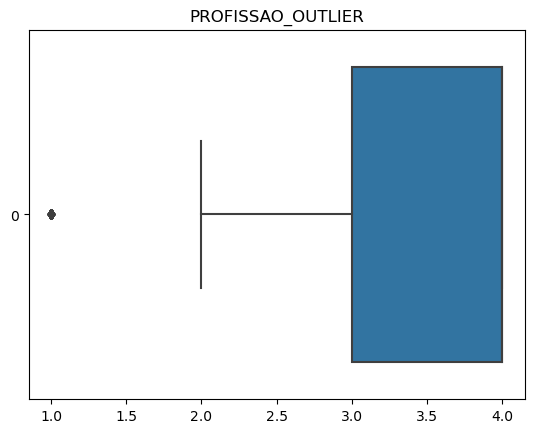

In [39]:
# Exemplos de geracao de histograma e boxsplot para analise exploratoria 
#srn.histplot(df.Profissao, color="blue", kde=True, stat="count", bins=10).set(title='VALORES_FINANCIEMANTO_HISTOGRAMA')
srn.boxplot(data=df.Profissao, orient='h').set_title('PROFISSAO_OUTLIER')


## **3.1 Analise exploratoria**
---
>### Com os dados ja tratados previamente, iremos gerar alguns histogramas e boxsplot para entender o comportamento de todos os campos da tabela.
>### Para isso foi criado um codigo para plotar todos os campos ao mesmo tempo.
>### Depois iremos criar uma matriz de correlação para ver qual atributo possui a maoir correlação com a classe. obs:Poderia reduzir a quantidade de atributos, mas deixei todos.
>### Criado um grafico de regressao linear simples apra visualizar a maior correlação entre atributos da tabela credito.

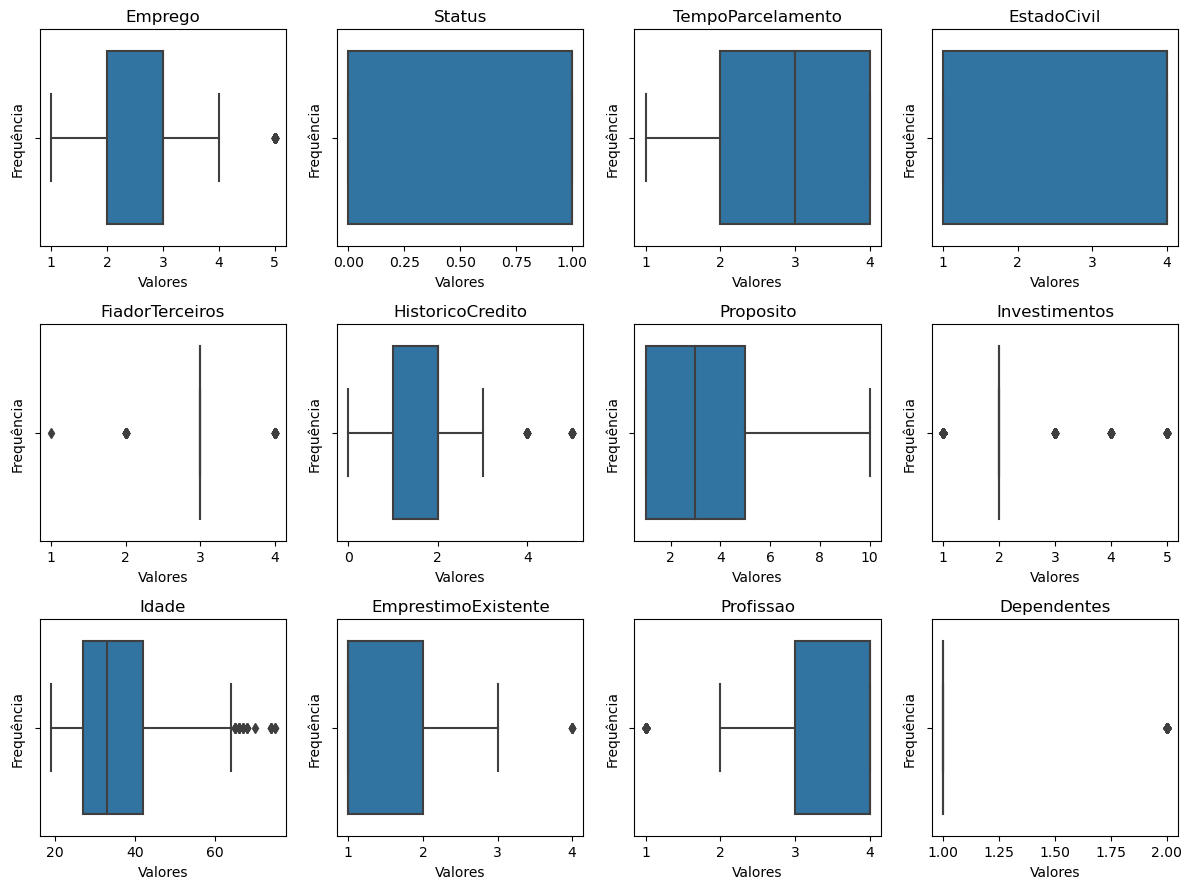

In [26]:
####### 
##  Inserir abixo todas as colunas para gerar o histograma
#######
colunas = ['Emprego','Status', 'TempoParcelamento', 'EstadoCivil','FiadorTerceiros','HistoricoCredito','Proposito','Investimentos','Idade','EmprestimoExistente','Profissao','Dependentes']

# Configurações dos subplots
num_subplots = len(colunas)
num_rows = math.ceil(num_subplots / 4 )
num_cols = 4

# Criação dos subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

axes = axes.flatten()

# Flatten the axes array, caso haja apenas um subplot
if num_subplots < num_rows * num_cols:
    for i in range(num_subplots, num_rows * num_cols):
        fig.delaxes(axes[i])

# Loop para criar os subplots
for i, coluna in enumerate(colunas):
    # Seleciona o subplot atual
    ax = axes[i]

    # Plot do histplot do Seaborn
    srn.boxplot(data=df, x=coluna, ax=ax, orient='h')
    
    # Configurações do subplot
    ax.set_title(coluna)
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frequência')

# Ajusta a posição dos subplots
plt.tight_layout()

# Exibe o gráfico
plt.show()

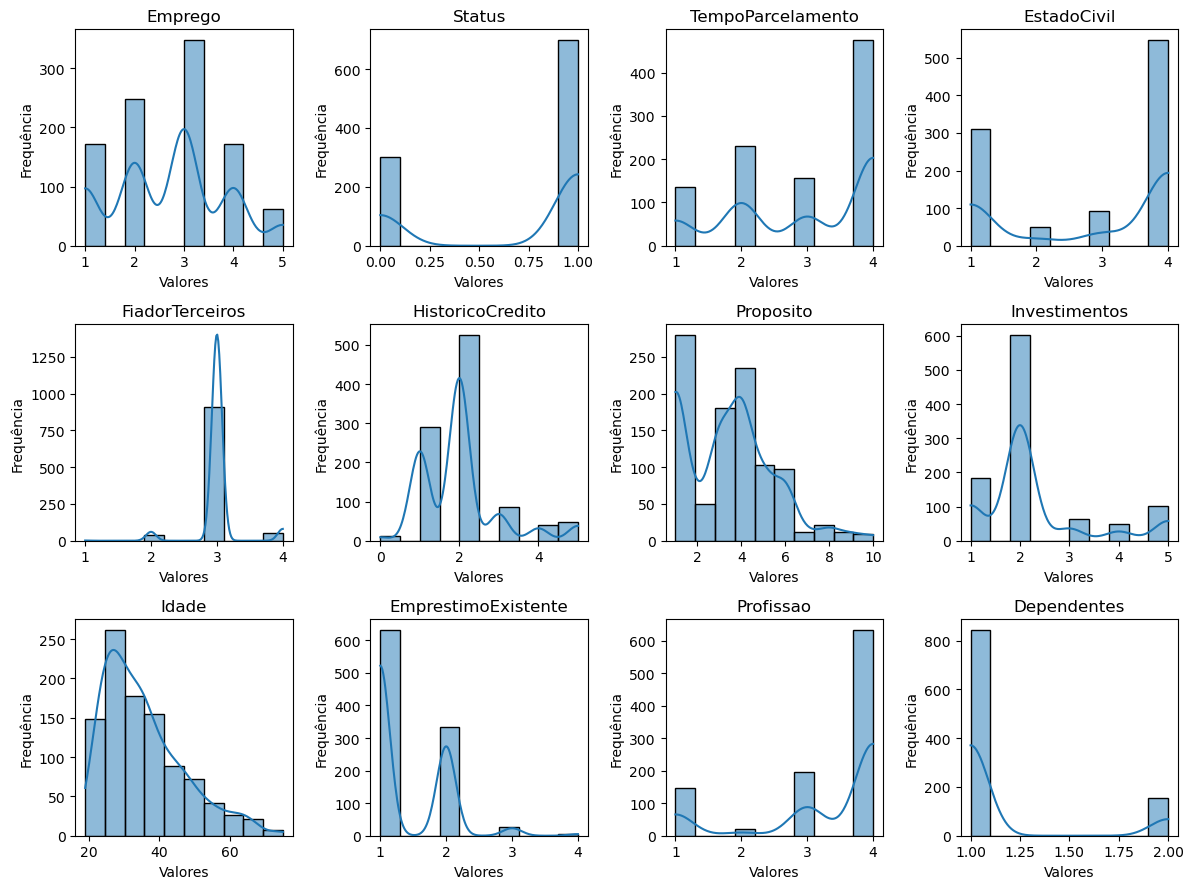

In [27]:
####### 
##  Inserir abixo todas as colunas para gerar o histograma
#######
colunas = ['Emprego','Status' ,'TempoParcelamento', 'EstadoCivil','FiadorTerceiros','HistoricoCredito','Proposito','Investimentos','Idade','EmprestimoExistente','Profissao','Dependentes']

# Configurações dos subplots
num_subplots = len(colunas)
num_rows = math.ceil(num_subplots / 4 )
num_cols = 4

# Criação dos subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

axes = axes.flatten()

# Flatten the axes array, caso haja apenas um subplot
if num_subplots < num_rows * num_cols:
    for i in range(num_subplots, num_rows * num_cols):
        fig.delaxes(axes[i])

# Loop para criar os subplots
for i, coluna in enumerate(colunas):
    # Seleciona o subplot atual
    ax = axes[i]

    # Plot do histplot do Seaborn
    srn.histplot(data=df, x=coluna, ax=ax,kde=True, stat="count", bins = 10)

    # Configurações do subplot
    ax.set_title(coluna)
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frequência')

# Ajusta a posição dos subplots
plt.tight_layout()

# Exibe o gráfico
plt.show()

## Matriz de Correlação

>### Notase que a maior correlação entre os atributos esta entre Duração X Valor o que faz total sentido. e nao temos correlações muito fortes para o campo status

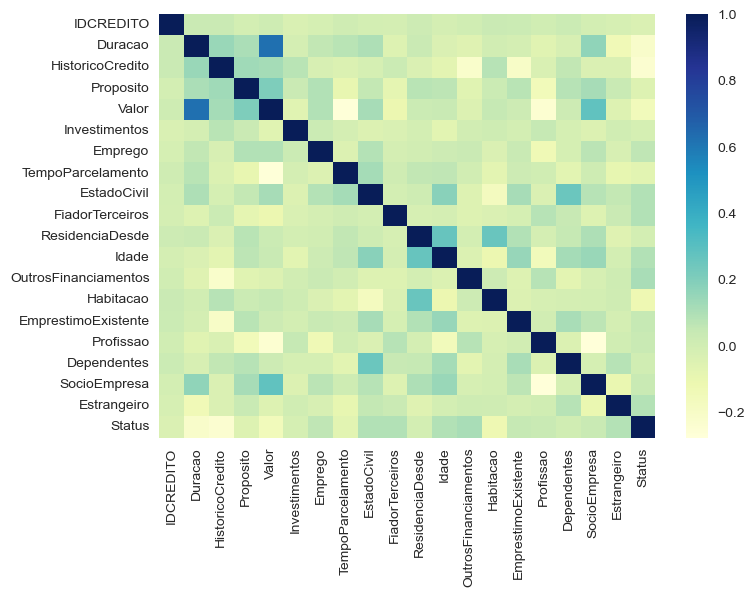

In [99]:
#Matriz de Correlação 
#Criando dataframe 
atributos = df.iloc[:,0:20]
atributos.corr() #Montando a matriz de correlação
srn.heatmap(atributos.corr(), annot=False, cmap = "YlGnBu") # annot para incluir informações dos valores, cmap para mudar cor

plt.show() 

In [173]:
atributos.corr()

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
IDCREDITO,1.000000,0.030788,0.028990,-0.003006,0.013488,-0.030361,-0.014409,0.010076,-0.005596,-0.010172,0.017892,-0.010096,0.004404,0.027450,0.022838,0.003733,0.026662,-0.007829,-0.018177,-0.034606
Duracao,0.030788,1.000000,0.142332,0.105305,0.624984,-0.009619,0.056546,0.074749,0.099678,-0.050890,0.030938,-0.036136,-0.054884,0.000035,-0.011284,-0.062177,-0.023834,0.164718,-0.138196,-0.214927
HistoricoCredito,0.028990,0.142332,1.000000,0.131805,0.119642,0.074861,-0.027669,-0.038270,-0.017768,0.025866,-0.034386,-0.077715,-0.219040,0.080316,-0.202561,-0.029474,0.055388,-0.033637,-0.036687,-0.241552
Proposito,-0.003006,0.105305,0.131805,1.000000,0.203234,0.031698,0.091536,-0.092747,0.048275,-0.080734,0.072266,0.066020,-0.061694,0.024680,0.071995,-0.148925,0.077245,0.116031,0.035655,-0.051311
Valor,0.013488,0.624984,0.119642,0.203234,1.000000,-0.060195,0.089145,-0.271316,0.114810,-0.110993,0.026832,0.032716,-0.046008,0.045966,0.020795,-0.246802,0.017142,0.276995,-0.050050,-0.154739
Investimentos,-0.030361,-0.009619,0.074861,0.031698,-0.060195,1.000000,0.026290,-0.010502,-0.043945,-0.029040,-0.006599,-0.068435,-0.001721,0.015697,-0.003050,0.043235,-0.015059,-0.047016,0.006803,-0.014445
Emprego,-0.014409,0.056546,-0.027669,0.091536,0.089145,0.026290,1.000000,-0.042865,0.082473,-0.008015,-0.001571,0.021658,0.031232,-0.036899,0.035803,-0.134579,-0.013720,0.067711,-0.024299,0.058396
TempoParcelamento,0.010076,0.074749,-0.038270,-0.092747,-0.271316,-0.010502,-0.042865,1.000000,0.118367,0.009573,0.053454,0.058266,-0.000983,-0.073615,0.021669,0.004673,-0.071207,0.014413,-0.090024,-0.072404
EstadoCivil,-0.005596,0.099678,-0.017768,0.048275,0.114810,-0.043945,0.082473,0.118367,1.000000,-0.006391,0.016579,0.177153,-0.047939,-0.171647,0.112438,-0.034087,0.253574,0.078919,0.049099,0.089535
FiadorTerceiros,-0.010172,-0.050890,0.025866,-0.080734,-0.110993,-0.029040,-0.008015,0.009573,-0.006391,1.000000,-0.018683,-0.010852,-0.047990,-0.033695,-0.013928,0.080481,0.038529,-0.049250,0.027398,0.087139


## REGRESSAO LINEAR Multipla

>### Realizado o grafico de regrassao dos dois atributos mais correlacionado (Valor x Duracao - ) nao satisfatorio

In [149]:
X1 = np.array(df.iloc[:,1]).reshape(-1, 1)
X2 = np.array(df.iloc[:,4]).reshape(-1, 1)
y = np.array(df.iloc[:,19])

In [164]:
x_treino, x_teste, y_treino, y_teste = train_test_split(np.concatenate((X1, X2), axis=1),y, test_size=0.1, random_state=1)

In [166]:

model.fit(x_treino,y_treino)

LinearRegression()

In [167]:
y_pred = model.predict(x_teste)

In [168]:
print(r2_score(y_teste,y_pred))

0.03569834851011533


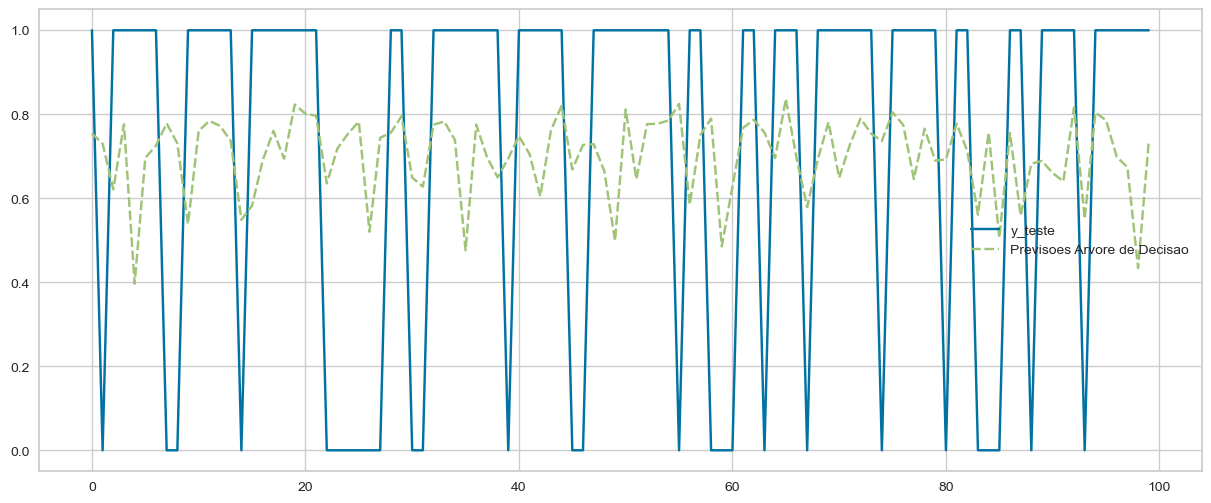

In [170]:
# O que o R2 faz, ele compara a distância quadrada do modelo com o teste
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsoes Arvore de Decisao'] = y_pred

plt.figure(figsize=(15,6))
srn.lineplot(data=tabela_auxiliar)
plt.show()

## **4.1 Criacao do melhor modelo preditivo de IA**
---
>### Mesmo obtendo as maiores correlações, foi realido varios testes com varias tecnicas e todos os artributos(Nao necessariamente mais atributos é melhor que menos atributos), mas a que mostrou melhor resultado foi a Randon Forest.
>### Tecnicas utilizada:
>### 1.Teorema de Bayes (66,6% )
>### 2.Arvore de Decisao (62,0% )
>### 3.Selecao de Atributo (66,6% )
>### 4.Aprendizado baseado em instancias (59,6% )
>### 5.Randon Forest (70,6%) - Best

In [48]:
from sklearn.model_selection import train_test_split #(Divisao dos dados TREINO/TESTES)
from sklearn.preprocessing import LabelEncoder #(Label encoding - string para number)
from sklearn.naive_bayes import GaussianNB #(Utilizar Nave bayes- probabilidade)
from sklearn.metrics import confusion_matrix, accuracy_score #(Criar matriz de confusao)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz #(Visualizacao)
from sklearn.tree import DecisionTreeClassifier #(Classificador de arvore de decisao)
from sklearn.ensemble import ExtraTreesClassifier #(Classificador de arvore de decisao)
from sklearn.svm import SVC #(Maquina de vetor de suporte)
from sklearn.neighbors import KNeighborsClassifier #(Classificador de vizinho mais proximo)
import graphviz #(Visualizacao)
from yellowbrick.classifier import ConfusionMatrix  #(Matriz de confusao de forma grafica)
from scipy import stats #()

In [41]:
#foi separados ps atributos da classe
previsores = df.iloc[:,0:19].values
classe = df.iloc[:,19].values

In [103]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

## **4.1.1 Teorema de Bayes**

In [49]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [50]:
previsoes = naive_bayes.predict(X_teste)
previsoes

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], d

In [51]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
#VN - FP
#FN - VP
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 35,  68],
       [ 32, 165]], dtype=int64)

In [52]:
# Medir taxa de acerto em percentual
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.6666666666666666

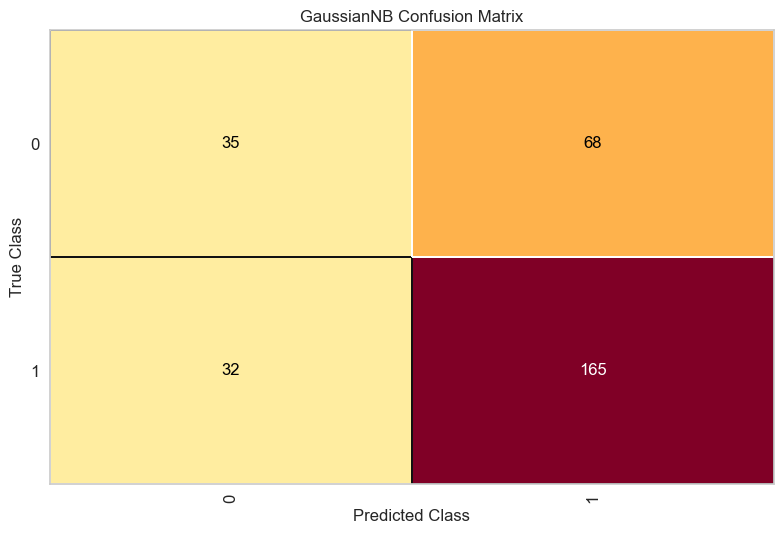

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [53]:
# Visualização da matriz de confusão
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

## **4.1.2 Arvore de Decisao**

In [54]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [55]:
# Exportação da árvore de decisão para o formato .dot, para posterior visualização - (Abrir arquivo e ver a arqvore de decisao em http://www.webgraphviz.com/?tab=map)
export_graphviz(arvore, out_file = 'tree.dot')

In [56]:
# Obtenção das previsões
previsoes = arvore.predict(X_teste)
previsoes

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], d

In [57]:
#matriz de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 34,  69],
       [ 45, 152]], dtype=int64)

In [58]:
#taxa acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.62

## **4.1.3 Selecao de Atributo**

In [59]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
svm = SVC()
svm.fit(X_treinamento, y_treinamento)

SVC()

In [60]:
#previsoes
previsoes = svm.predict(X_teste)
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [61]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.6666666666666666

In [62]:
# Utilização do algoritmo ExtraTreesClassifier para extrair as características mais importantes, classifica por importancia
forest = ExtraTreesClassifier()
forest.fit(X_treinamento, y_treinamento)
importancias = forest.feature_importances_
importancias

array([0.07571982, 0.08477252, 0.09060889, 0.06766507, 0.09092138,
       0.05135797, 0.05733182, 0.05410206, 0.0433279 , 0.02478117,
       0.05649748, 0.08002488, 0.03435792, 0.04000702, 0.04034218,
       0.04435997, 0.02021595, 0.0354066 , 0.00819941])

## **4.1.4 Aprendizado baseado em instancias**

In [63]:
# Criação do modelo, treinamento, 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_treinamento, y_treinamento)

KNeighborsClassifier(n_neighbors=3)

In [64]:
#obtenção das previsões
previsoes = knn.predict(X_teste)
previsoes

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], d

In [65]:
#obtenção da matriz de confusão 
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 25,  78],
       [ 43, 154]], dtype=int64)

In [66]:
#taxas de acerto e erro
taxa_acerto = accuracy_score(y_teste, previsoes)
#taxa_erro = 1 - taxa_acerto
taxa_acerto

0.5966666666666667

## **4.1.5 Randon Forest**

In [67]:
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [68]:
floresta.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1943244731),
 DecisionTreeClassifier(max_features='sqrt', random_state=114832129),
 DecisionTreeClassifier(max_features='sqrt', random_state=888196966),
 DecisionTreeClassifier(max_features='sqrt', random_state=16235409),
 DecisionTreeClassifier(max_features='sqrt', random_state=1145679150),
 DecisionTreeClassifier(max_features='sqrt', random_state=506633369),
 DecisionTreeClassifier(max_features='sqrt', random_state=1256929816),
 DecisionTreeClassifier(max_features='sqrt', random_state=1542697478),
 DecisionTreeClassifier(max_features='sqrt', random_state=1865658523),
 DecisionTreeClassifier(max_features='sqrt', random_state=420589977),
 DecisionTreeClassifier(max_features='sqrt', random_state=683984656),
 DecisionTreeClassifier(max_features='sqrt', random_state=290627968),
 DecisionTreeClassifier(max_features='sqrt', random_state=770258394),
 DecisionTreeClassifier(max_features='sqrt', random_state=548482396),
 DecisionTreeCla

In [69]:
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7066666666666667

# Para realizar uma nova previsao com base no modelo escolhido?
---
>## Segue abaixo

In [70]:
##Criado uma base fake com atributos e realizado previsao para este modelo
df_t = nova base com todos os atributos
floresta.predict(df_t)

C:\Users\hugo\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

# CONCLUSAO
---
>>## APOS AVALIAR DIVERSAS TECNICAS DE PREDIÇÃO COM MACHINE LEARNING:
>>#Nao identificado correlações fortes com o campo status
>>#Os dois atributos de maior correlção foi aplicado regressao linear multipla com o campo Status e nao foi identificado um bom padrao.
>>#A melhor tecnica de predição é a Randon forest que foi realizada com todos os atributos e retornou uma taxa de 70% de acerto.

